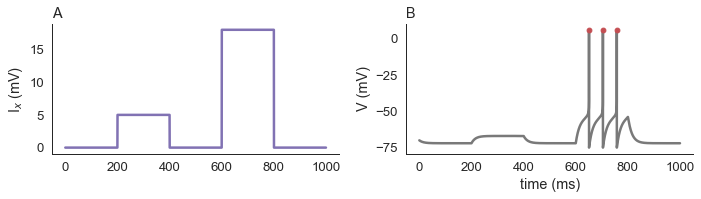

In [6]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=False
###############################################
###############################################

# Discretized time
T=1000
dt=.1
time=np.arange(0,T,dt)

# Applied current
Ix=np.zeros_like(time)
Ix[(time>=200) & (time<=400)]=5
Ix[(time>=600) & (time<=800)]=18


# Neuron parameters
EL=-72
taum=15
Vth=5
Vre=-75
VT=-55
D=2

# Initial condition
V0=-70 


# Compute V using the forward Euler method
V=np.zeros_like(time)
SpikeTimes=np.array([])
V[0]=V0 
for i in range(len(time)-1):
    
    # Euler step
    V[i+1]=V[i]+dt*(-(V[i]-EL)+D*np.exp((V[i]-VT)/D)+Ix[i])/taum 

    # Threshold-reset condition
    if V[i+1]>=Vth:
        V[i+1]=Vre 
        V[i]=Vth  # This makes plots nicer
        SpikeTimes=np.append(SpikeTimes,time[i+1])
        


# Make figure
plt.subplots(figsize=(10, 3))

plt.subplot(1,2,1)
plt.plot(time,Ix,'m')
#plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()


plt.subplot(1,2,2)
plt.plot(time,V,color=sns.color_palette()[7])
plt.plot(SpikeTimes,Vth+1+0*SpikeTimes,'ro')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('B',loc='left')
plt.tight_layout()


# Save figure if needed
if SaveFigures:
      plt.savefig('../Figures/EIF.pdf')



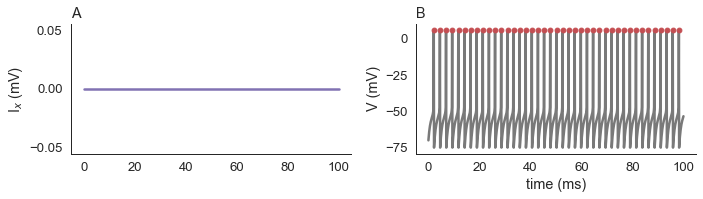

In [15]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Keep this set to false unless you want to save figures and data
# (in which case you'll need to change some directories below)
SaveFigures=False
###############################################
###############################################

# Discretized time
T=100
dt=.1
time=np.arange(0,T,dt)

# Applied current
Ix=np.zeros_like(time)
Ix[(time>=200) & (time<=400)]=5
Ix[(time>=600) & (time<=800)]=18


# Neuron parameters
EL=-72
taum=15
Vth=5
Vre=-75
VT=-55
D=2
EChR=50
gChRL=.2

# Initial condition
V0=-70 


# Compute V using the forward Euler method
V=np.zeros_like(time)
SpikeTimes=np.array([])
V[0]=V0 
for i in range(len(time)-1):
    
    # Euler step
    V[i+1]=V[i]+dt*(-(V[i]-EL)+D*np.exp((V[i]-VT)/D)-gChRL*(V[i]-EChR))/Cm 

    # Threshold-reset condition
    if V[i+1]>=Vth:
        V[i+1]=Vre 
        V[i]=Vth  # This makes plots nicer
        SpikeTimes=np.append(SpikeTimes,time[i+1])
        


# Make figure
plt.subplots(figsize=(10, 3))

plt.subplot(1,2,1)
plt.plot(time,Ix,'m')
#plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()


plt.subplot(1,2,2)
plt.plot(time,V,color=sns.color_palette()[7])
plt.plot(SpikeTimes,Vth+1+0*SpikeTimes,'ro')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('B',loc='left')
plt.tight_layout()



